# Ridge and Lasso Regression

 Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.




In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#L2
from sklearn.linear_model import Ridge
#L1
from sklearn.linear_model import Lasso

## load DataSet

In [7]:
boston_df = pd.read_csv('boston_house_prices.csv', skiprows=1)
display(boston_df)
#boston = datasets.load_boston()
#boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 波士頓房價

檔案中包含506條樣本資料，即有506條房價資料，而13表示有13個影響房價的特徵值
特徵值解釋如下表
![波士頓房價檔案部分中英文標題](images/boston_1.png)

In [28]:
#print("資料包內含資料的key值：", boston.keys())
#print("資料欄位名稱(資料特徵參數)：",boston.feature_names)
#print("檔案位置:",boston['filename'])
#print("第一筆資料:",boston.data[:1])
#print("資料型別:",type(boston.data))


#target_names = boston.target
#print("資料size:",boston['data'].size)
#print("前10筆target_names(房價): ", boston['target'][:10])
#print(boston.target)


#組成 pandas DataFrame (資料表的方式顯示)


#x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
#print("pandas DataFrame\n",x.head(5),sep='')


boston_data = boston_df.iloc[:, :13]
boston_target = boston_df[['MEDV']]
boston_feature = boston_data.columns
#print(boston_data)
print(boston_feature)
#print(boston_target)



Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [52]:
import pandas as pd
#x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
#y = pd.DataFrame(boston['target'],columns=['target'])

X_train,X_test,y_train,y_test=train_test_split(boston_data,boston_target,test_size=0.3,random_state=3)

print(len(X_test), len(y_test))

print(len(X_train), len(y_train))

152 152
354 354


In [53]:
#x.shape
boston_data.shape

(506, 13)

## Create a Ridge Regression
       shrinking coefficient magnitude using Ridge regression
       
###   Ridge (L2 norm)
![image.png](https://miro.medium.com/max/1374/1*hAGhQehrqAmT1pvz3q4t8Q.png)
 
![image.png](https://miro.medium.com/max/670/1*sC4KLMHU0j_1gR3VmlgGtg.png)


In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)


linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576858
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123908
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921935


In [55]:
rr.coef_

array([[-1.28869508e-01,  4.62616037e-02, -5.46734649e-02,
         3.82991200e+00, -1.23346502e+01,  3.72939688e+00,
         7.27044718e-03, -1.19369533e+00,  2.79812365e-01,
        -7.75637125e-03, -8.25725742e-01,  1.25406308e-02,
        -5.56819788e-01]])

In [56]:
type(rr.coef_)
np.ravel(rr.coef_)


array([-1.28869508e-01,  4.62616037e-02, -5.46734649e-02,  3.82991200e+00,
       -1.23346502e+01,  3.72939688e+00,  7.27044718e-03, -1.19369533e+00,
        2.79812365e-01, -7.75637125e-03, -8.25725742e-01,  1.25406308e-02,
       -5.56819788e-01])


### $\alpha$ 愈小則等同於Linear Regression; $\alpha$ 愈大則會限制$\omega$ 的值。<br>這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

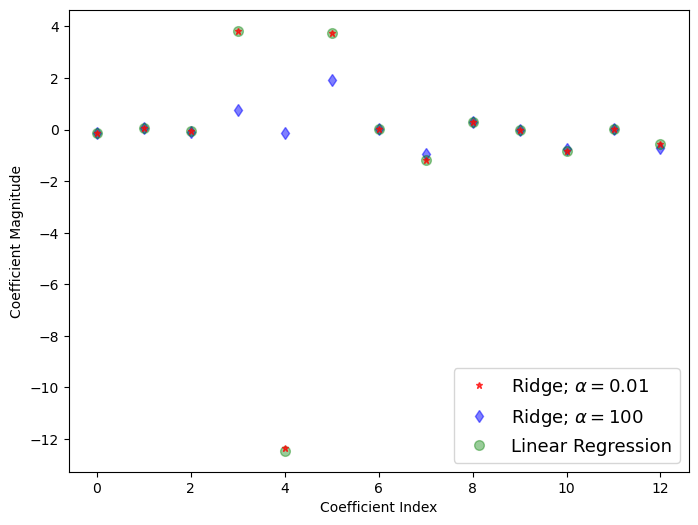

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(np.ravel(rr.coef_),alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers # zorder for ordering the markers
plt.plot(np.ravel(rr100.coef_),alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(np.ravel(lr.coef_),alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(fontsize=13,loc=4)
plt.show()

## Create a Lasso Regression


### Lasso (L1 norm)
 ![image.png](https://miro.medium.com/max/1402/1*P5Lq5mAi4WAch7oIeiS3WA.png)
 
 ![image.png](https://miro.medium.com/max/949/1*JH9eAS2I9mwOpuFLg-gD6g.png)


In [58]:
lasso = Lasso(alpha=1) #default alpha=1
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
#Lasso(alpha=0.01)
print("number of features used: ", coeff_used)
print(lasso)

training score: 0.6832133784853487
test score:  0.6364462662362061
number of features used:  11
Lasso(alpha=1)


In [59]:
lasso.coef_

array([-0.08154377,  0.05590332, -0.03322822,  0.        , -0.        ,
        0.73410469,  0.03225416, -0.52412342,  0.24767785, -0.01075051,
       -0.64540215,  0.01017496, -0.81504887])

In [60]:
#Lasso(alpha=0.01)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001 )
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
print('-'*20)
#Lasso(alpha=0.0001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

#LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print('-'*20)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

InvalidParameterError: The 'max_iter' parameter of Lasso must be an int in the range [1, inf) or None. Got 1000000.0 instead.


### $\alpha$=0.01 會比$\alpha$=0.1 使$\omega$ 更小<br> 若$\omega$ 很小等於Linear regression 這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

AttributeError: 'Lasso' object has no attribute 'coef_'

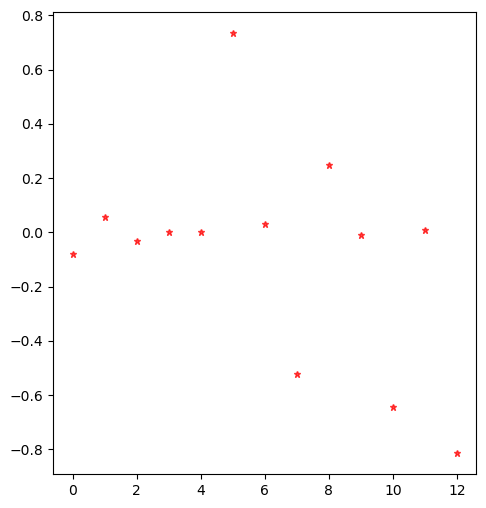

In [47]:
plt.figure(figsize=(12, 6),)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(np.ravel(lr.coef_),alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.legend(fontsize=13,loc=4)

plt.show()

愈高維度時, Lassso 愈有機會只使用部份特徵(部份切面)來找到低點, 而Ridge像球體一樣無法只用部份特徵才找到最低點

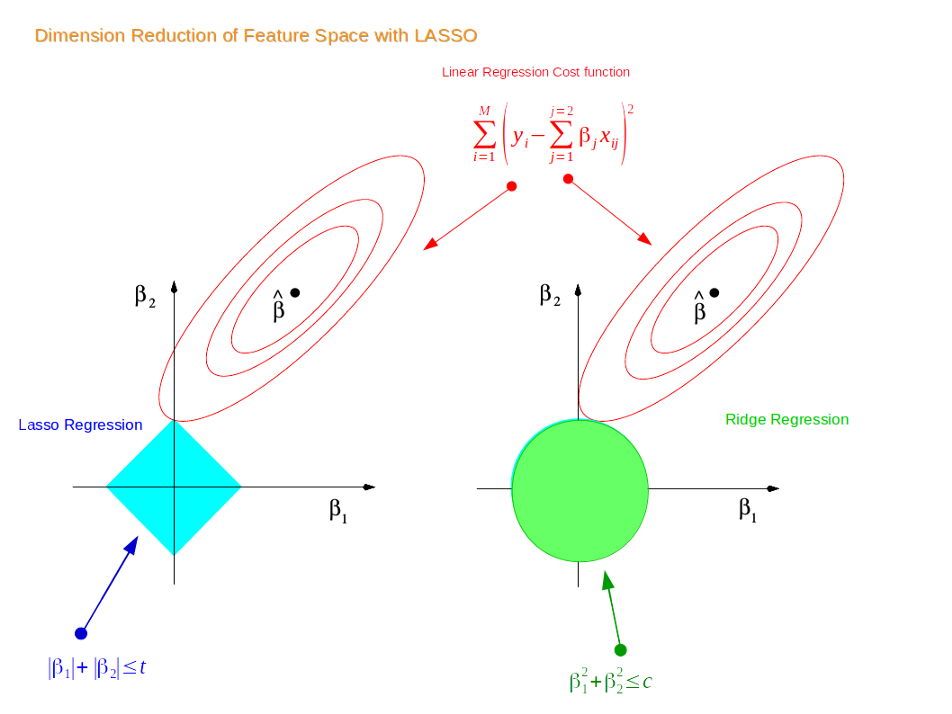

## R2 Score 

In [44]:
from sklearn.metrics import r2_score
#R2 square
r2_score(y_test,rr100.predict(X_test))

0.6805765856921935